<a href="https://colab.research.google.com/github/yhy0519/Project_of_Python/blob/main/K_beauty_%EC%98%A8%EB%9D%BC%EC%9D%B8_%ED%8C%90%EB%A7%A4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액**
**1.1 K-Beauty 는 성장하고 있을까?  해외 직접판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?**

    ** K-Beauty 란 ?  https://en.wikipedia.org/wiki/K-Beauty
    ** e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 ( 단위 : 백만원 )
    ** https://kosis.kr/index/index.do : 국가통계포털 데이터

**<온라인 쇼핑 판매액>**

    지난해 연간 온라인 쇼핑 판매액이 18% 증가했습니다.
    이 분석을 한 뒤에 구매액도 분석해보면 좋을 것 같습니다.
    어떤 국가로 어떤 판매전략을 세우면 좋을 지 분석해보겠습니다.

 

# **2. 필요 라이브러리 가져오기**

In [ ]:
# 라이브러리 로드
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 시각화를 위한 폰트 설정
import os

# os.name  -->  'posix'

if os.name == 'posix':            # mac os
  sns.set(font="AppleGothic")
elif os.name == 'nt':             # window
    sns.set(font="Malgun Gothic")

mac os라면 'posix'라는 문구가 뜨고 Windows는 nt라는 문구가 뜹니다.
OS 별로 다른 서체를 설정해줍니다.

# **3. 데이터 로드하기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.read_csv('/content/drive/MyDrive/data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201222093652.csv', encoding = 'cp949')

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,450568,511395,494391,560853,726741,768504,574551,749612,858240,833672,897205,921586,974060,1250236,1344404,1525396,1879499
1,합계,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,610257,441096,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,158247,133455,138982,180356,168059,171886,159750,203404,179543,187246,189024,223864
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,4048,4211,3693,3160,3270,2610,2043,2018,2158,5236,3854,4320,4511,3702,4038,3670,3826
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,5,3,5,1,2,6,1,215,2,0,1,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,656,596,567,634,665,469,504,589,465,488,308,531
447,기타,기 타,계,765,735,849,804,788,805,724,838,852,588,589,714,883,746,814,1101,1067,1063,1120,770,711,689,469,1094
448,기타,기 타,면세점,-,-,-,-,-,-,-,-,-,-,-,-,2,0,82,266,272,316,404,0,0,1,0,1


1사분기부터 4사분기까지의 데이터가 column으로 나와있습니다.  
사이트 하단에 각 값이 어떤 것을 의미하는 것인지가 나와있습니다.  
예) e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호  
현재 상태가 시각화, 분석화하기가 어렵습니다.

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201222093652.csv', encoding = 'cp949')
df_raw.shape   # 차원확인 (450, 30) : 450행, 30열

(450, 27)

In [ ]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

유럽연합(EU)      45
합계            45
아세안(ASEAN)    45
기타            45
미국            45
중남미           45
중국            45
대양주           45
일본            45
중동            45
Name: 국가(대륙)별, dtype: int64

데이터가 45개씩 들어있습니다.

In [ ]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848
46,미국,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,37009,31793,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,2033,1553,1784,1774,1298,1408,1653,1382
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,1,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,1054,946,791,854,2033,1553,1784,1773,1298,1408,1653,1382
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,3286,3571,2921,2744,3354,2730,2425,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,18,23,29,32,65,38,72,52,66,116,107,49
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,2712,2402,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736
54,미국,소프트웨어,계,47,57,49,128,182,113,163,116,147,103,82,83,67,45,37,125,175,251,172,269,88,156,118,338


미국의 데이터만 살펴봅니다.

# **4. 분석과 시각화를 위한 tidy data 만들기**

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

melt 함수


집계를 한 데이터를 tidy data 형식으로 만들어야 합니다.

melt를 사용해보겠습니다. melt는 행에 있는 데이터를 열로 옮기는 것입니다.

In [ ]:
df_raw.melt?

로 옵션을 살펴봅니다.

Examples

    >>> df.melt(id_vars=['A'], value_vars=['B'])

id_vars로 id값으로 사용할 열을 지정하고, value_vars에는 value으로 들어가는 열을 지정합니다.

In [ ]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014 1/4', '2014 2/4', '2014 3/4',
       '2014 4/4', '2015 1/4', '2015 2/4', '2015 3/4', '2015 4/4', '2016 1/4',
       '2016 2/4', '2016 3/4', '2016 4/4', '2017 1/4', '2017 2/4', '2017 3/4',
       '2017 4/4', '2018 1/4', '2018 2/4', '2018 3/4', '2018 4/4', '2019 1/4',
       '2019 2/4', '2019 3/4', '2019 4/4'],
      dtype='object')

column 명이 생각나지 않는다면 df_raw.columns를 사용하면 됩니다.

In [ ]:
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"])

,국가(대륙)별,상품군별,판매유형별,variable,value
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


id_vars에 들어가지 않은 열들은 value_vars에 들어갑니다.

In [ ]:
df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-
...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531
10797,기타,기 타,계,2019 4/4,1094
10798,기타,기 타,면세점,2019 4/4,1


variable, value라는 column의 이름을 "기간", "백만원"으로 변경합니다.

In [ ]:
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.shape

(10800, 5)

In [ ]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


값에 "합계"가 많으므로 다음 시간에 전처리를 해보겠습니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


연도와 분기를 분리하고, 숫자로 변경해야 합니다.

# **5. 데이터 전처리**

**5.1 기간에서 연도를 분리하기**

In [ ]:
df["기간"]

0        2014 1/4
1        2014 1/4
2        2014 1/4
3        2014 1/4
4        2014 1/4
           ...   
10795    2019 4/4
10796    2019 4/4
10797    2019 4/4
10798    2019 4/4
10799    2019 4/4
Name: 기간, Length: 10800, dtype: object

2014년부터 2019년 데이터를 볼 수 있습니다.

In [ ]:
"2019 3/4 p)".split()

['2019', '3/4', 'p)']

split()을 사용하면 공백으로 데이터를 분리합니다. 

In [ ]:
"2019 3/4 p)".split()[0]

'2019'

첫번째 인덱스를 가져오면 '2019'만 불러옵니다.

In [ ]:
type("2019 3/4 p)".split()[0])

str

데이터 타입을 찍어보면 string 타입이라는 것을 알 수 있습니다.



In [ ]:
int("2019 3/4 p)".split()[0])

2019

integer 형으로 변경해줍니다.

In [ ]:
df["기간"].map?

    Init signature: map(*args, **kwargs)
    Docstring:     
    map(func, *iterables) --> map object

    Make an iterator that computes the    function using arguments from
    each of the iterables.  Stops when the shortest iterable is exhausted.
    Type:           type

map은 안에 함수를 넣을 수 있습니다.

In [ ]:
df["기간"].map(lambda x : int(x.split()[0]))

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
10795    2019
10796    2019
10797    2019
10798    2019
10799    2019
Name: 기간, Length: 10800, dtype: int64

map 안에 lambda 함수를 넣습니다.  
x.split()한 데이터의 첫번째 인덱스 값을 integer 형으로 변경합니다.



숫자만 결과로 나옵니다.

In [ ]:
df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


map으로 "연도"라는 열을 만들어서 df에 추가했습니다.

In [ ]:
"2020 3/4 p)".split()[1].split("/")

['3', '4']

이번에는 "분기" 열을 만들어보겠습니다.


공백과 /을 기준으로 데이터를 split하여 3/4에 있는 3과 4를 분리시켜보겠습니다.

In [ ]:
"2020 3/4 p)".split()[1].split("/")[0]

'3'

3/4에 있는 앞의 3를 가져옵니다.

In [ ]:
# 기간에서 분기만 분리하기
df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))

0        1
1        1
2        1
3        1
4        1
        ..
10795    4
10796    4
10797    4
10798    4
10799    4
Name: 기간, Length: 10800, dtype: int64

In [ ]:
# 분기 컬럼 만들기
df["분기"] = df["기간"].map(lambda x : int(x.split()[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


"분기"라는 새로운 열에 해당 lambda 함수를 적용합니다.



**5-2 금액을 수치 데이터로 표현하기 위해 데이터 타입 변경**

In [ ]:
# - 문자를 결측치로 변경
df["백만원"].replace("-", pd.np.nan)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


0        148272
1           NaN
2           NaN
3          4915
4           NaN
          ...  
10795         0
10796       531
10797      1094
10798         1
10799      1093
Name: 백만원, Length: 10800, dtype: object

2016년 이전 데이터는 결측치가 많고, -으로 기록되어 있습니다.  
-로 표시된 값은 결측치이므로 NaN으로 대치(replace) 합니다.



numpy를 로드하지 않았으면 pandas 안에 있는 np.nan을 쓸 수 있습니다.



In [ ]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기

df["백만원"] = df["백만원"].replace("-", pd.np.nan).astype(float)
df["백만원"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


0        148272.0
1             NaN
2             NaN
3          4915.0
4             NaN
           ...   
10795         0.0
10796       531.0
10797      1094.0
10798         1.0
10799      1093.0
Name: 백만원, Length: 10800, dtype: float64

astype(float)를 활용하여 데이터를 float 데이터 형태를 확인할 수 있습니다.



-은 NaN으로 변경하였고, 숫자는 소숫점으로 변경하였습니다.



replace()한 값을 "백만원" 열에 덮어쓰기합니다.

**5-3 필요 없는 데이터 제거하기**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


데이터셋의 용량은 664KB입니다.

In [ ]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거합니다.

df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
49,미국,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1
50,미국,컴퓨터 및 주변기기,면세점 이외,2014 1/4,NaN,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
52,미국,가전·전자·통신기기,면세점,2014 1/4,NaN,2014,1
...,...,...,...,...,...,...,...
10795,기타,생활용품 및 자동차용품,면세점,2019 4/4,0.0,2019,4
10796,기타,생활용품 및 자동차용품,면세점 이외,2019 4/4,531.0,2019,4
10797,기타,기 타,계,2019 4/4,1094.0,2019,4
10798,기타,기 타,면세점,2019 4/4,1.0,2019,4


값이 "합계"가 아닌 데이터만 집계하여 df을 다시 업데이트합니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


637KB로 메모리 용량이 줄어듭니다.

In [ ]:
# 결측치 보기
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

백만원에 결측치가 있습니다. 금액이 없는 데이터도 있다는 것을 참고합니다.

# **6 K-Beauty 시각화**

**6-1 전체 상품군 판매액**

NaN으로 표시된 결측치 데이터가 있으면 시각화가 잘 안나타날 수 있으므로 NaN으로 나타난 행의 데이터를 제거하고 시각화를 해보겠습니다.

In [ ]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지
# 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있습니다.

df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


"판매유형별"이 "계"인 데이터를 가져옵니다.

**<코랩에서 그래프 한글깨 짐 현상 발생>**  
https://teddylee777.github.io/colab/colab-korean  
위의 사이트를 참고

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

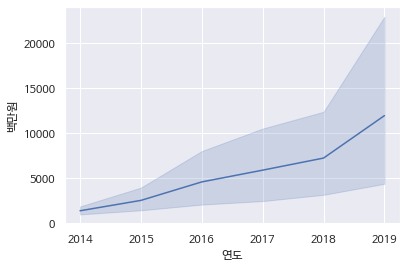

In [ ]:
# 연도, 판매액 lineplot으로 그리기

sns.lineplot(data=df_total, x="연도", y="백만원")

연도에 따른 판매액을 lineplot을 그려봅니다.

** legend를 그래프 밖에 그리기  
[matplotlib - Move legend outside figure in seaborn tsplot - Stack Overflow](https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

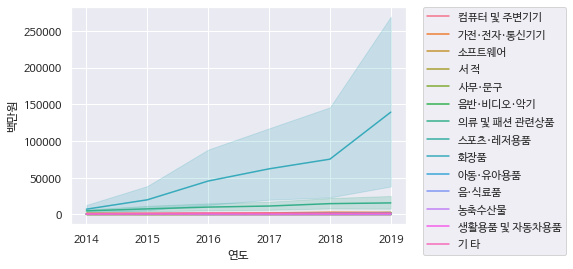

In [ ]:
# 연도, 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기

sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

상품군 별로 다른 색상으로 표시하고자 합니다.

legend 값을 밖에 표시하는 소스코드를 stack overflow에서 가져옵니다.

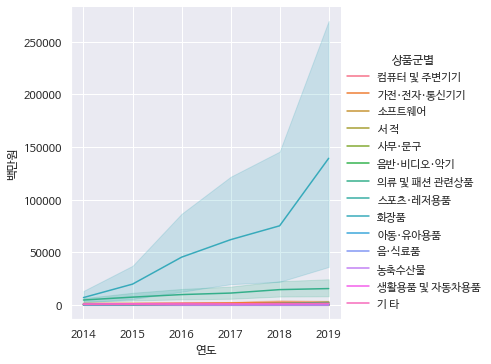

In [ ]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기

sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line")

relplot을 lineplot의 서브플롯을 그리기 위해 사용하겠습니다.

kind를 "line"으로 설정합니다.

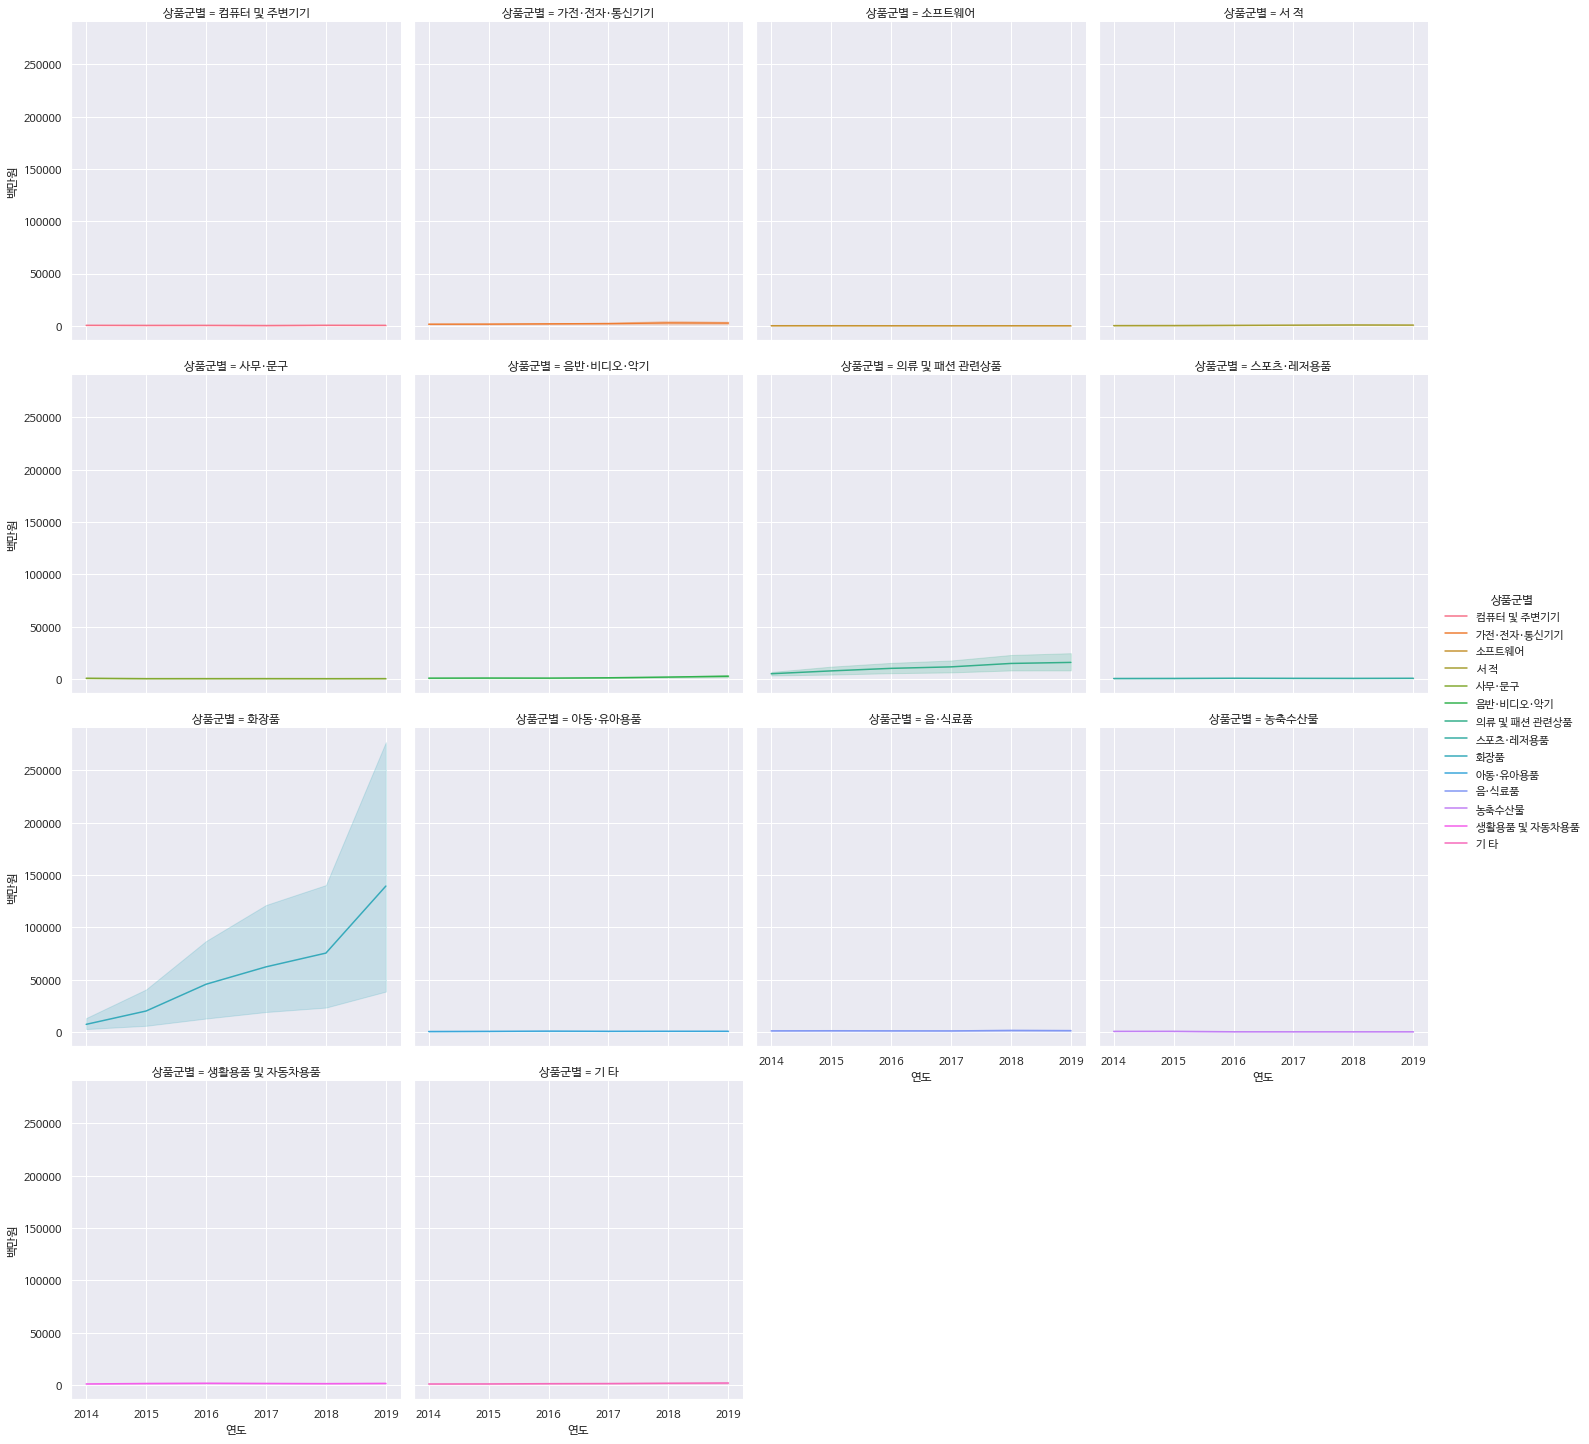

In [ ]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기

sns.relplot(data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

상품군별로 색상을 다르게 하기 위해 col 옵션을 활용하고, 한 행에 4개를 표시하기 위해 col_wrap 옵션을 사용합니다.

In [ ]:
# isin을 사용해 화장품만 제외를 하고 df_sub 이라는 변수에 담습니다.

df_sub = df_total[~df_total["상품군별"].isin(["화장품"])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4,193.0,2019,4
10788,기타,음·식료품,계,2019 4/4,319.0,2019,4
10791,기타,농축수산물,계,2019 4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4,531.0,2019,4


화장품이 다른 상품군들에 비해 해외직접판매액이 꾸준히 증가하고 있다는 것을 알 수 있습니다. 다른 값들은 잘 안나타나므로 화장품을 빼고 보겠습니다.



~를 사용하면 데이터가 반전됩니다. 상품군별이 "화장품"인 데이터만 빼고 df_sub 변수에 담습니다.

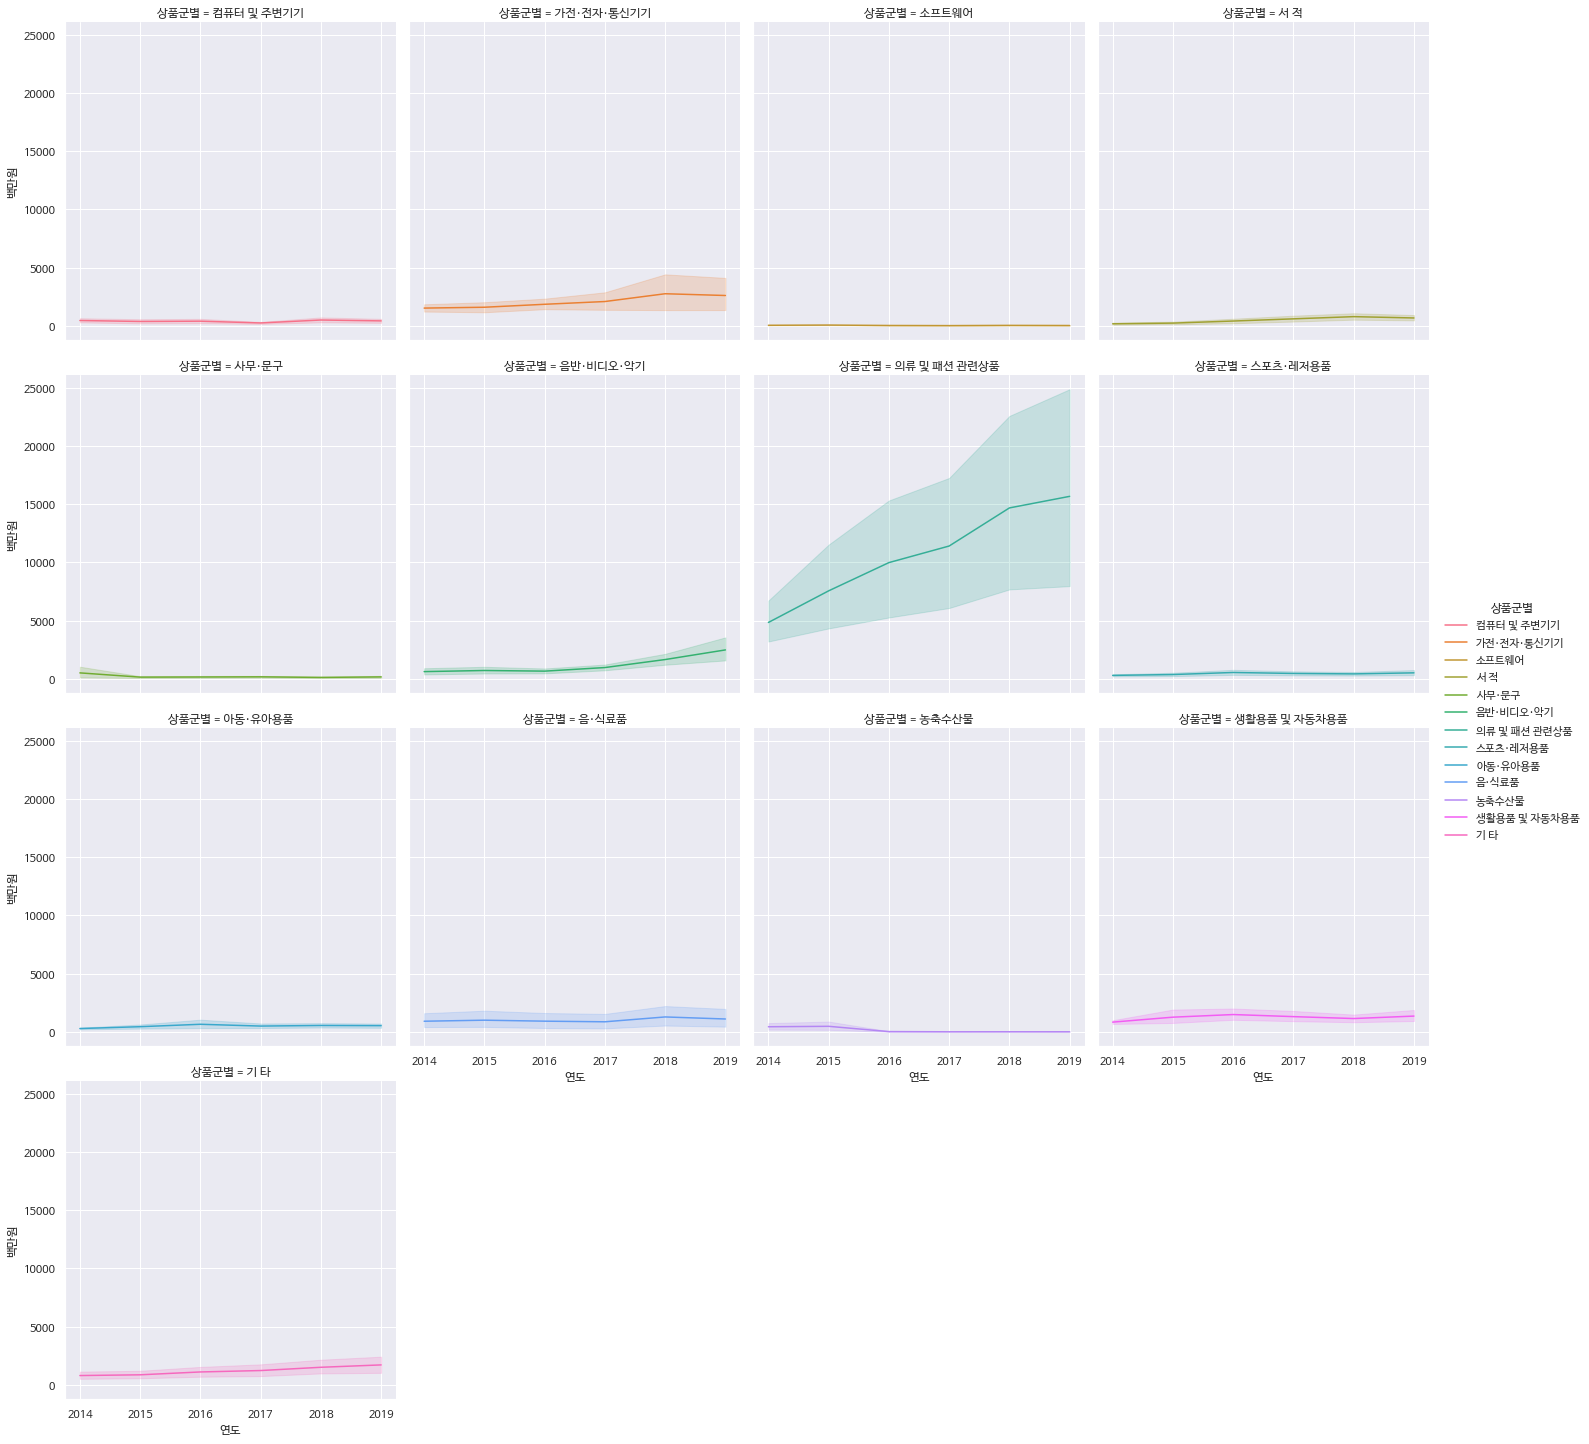

In [ ]:
# 연도별 판매액을 상품군별로 replot을 활용해 서브플롯으로 그려보기

sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")

kind의 기본값이 scatter이므로 line으로 바꿔줍니다. 의류, 패션 상품도 많이 판매함을 알 수 있습니다. 가전 전자 통신기기와 음반 비디오 악기 쪽도 성장세가 있음을 알 수 있습니다.

In [ ]:
df_sub1 = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()

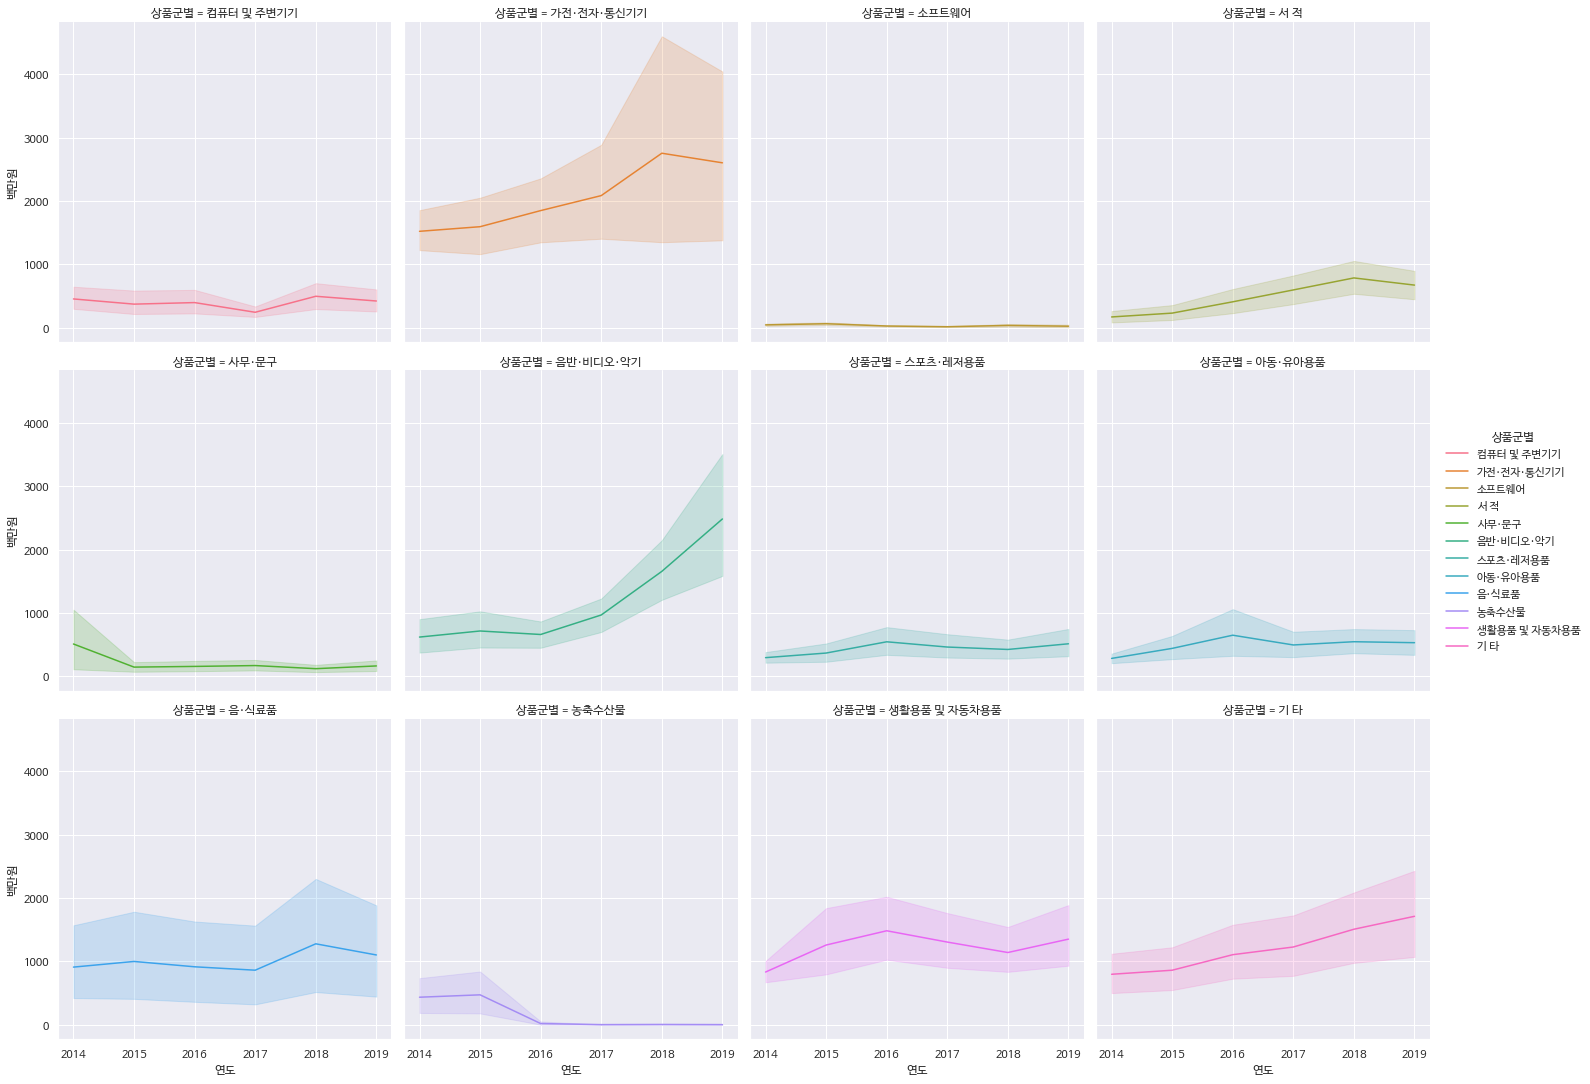

In [ ]:
sns.relplot(data=df_sub1, x="연도", y="백만원", hue="상품군별", col="상품군별", col_wrap=4, kind="line")

의류 및 패션 관련상품도 빼고 나니 가전과 음반 쪽 판매가 두드러지게 나타납니다.

**6-2 화장품의 온라인쇼핑 해외직접판매액**

**<분기별 화장품 판매액 데이터 시각화>**

In [ ]:
df_total["상품군별"] == "화장품"

48       False
51       False
54       False
57       False
60       False
         ...  
10785    False
10788    False
10791    False
10794    False
10797    False
Name: 상품군별, Length: 3024, dtype: bool

In [ ]:
# df_cosmetic 이라는 변수에 상품군이 화장품인 데이터만 가져오기

df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014 1/4,937.0,2014,1
...,...,...,...,...,...,...,...
10602,유럽연합(EU),화장품,계,2019 4/4,3912.0,2019,4
10647,중동,화장품,계,2019 4/4,1134.0,2019,4
10692,중남미,화장품,계,2019 4/4,638.0,2019,4
10737,대양주,화장품,계,2019 4/4,1094.0,2019,4


상품군별이 화장품인 데이터를 가져옵니다.


copy()로 복사하지 않으면 원본 데이터에 영향을 미칠 수 있습니다.

In [ ]:
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

어떤 값이 들어있는지 unique()로 확인하면 화장품만 있는 것을 확인할 수 있습니다

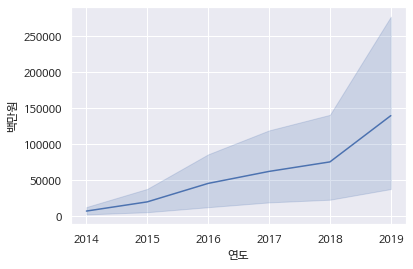

In [ ]:
# 연도와 판매액을 lineplot 으로 그리기

sns.lineplot(data=df_cosmetic, x="연도", y="백만원")

시각화 그래프를 그려봅니다. 


2019년까지 꾸준히 성장하고 있습니다.

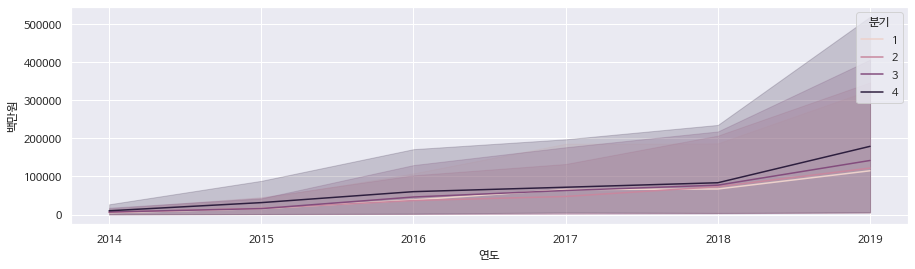

In [ ]:
# 연도와 판매액을 lineplot 으로 그리고 분기별로 다른 색상으로 표현해 보기
 
plt.figure(figsize=(15, 4))   # 그래프 사이즈 조정
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

분기 별로 살펴보겠습니다.



시각화 그래프를 그려보니 1분기부터 4분기까지 계속 성장하고 있습니다.

**<기간별 화장품 판매액 데이터 시각화>**

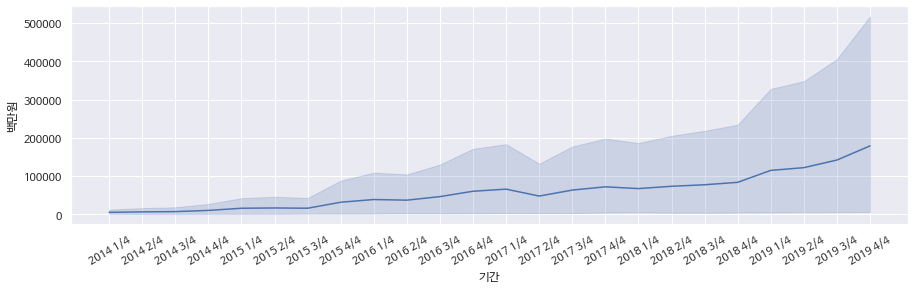

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)   # x축 값 기울기 조정
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

이번에는 연도가 아닌 기간으로 그래프를 그려보겠습니다.



글씨를 겹쳐지지 않게 하기 위해 xticks()를 사용하여 글자를 회전시킵니다.



역시 화장품 판매액의 증가를 꾸준히 확인할 수 있습니다.

In [ ]:
df_cosmetic.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
72,미국,화장품,계,2014 1/4,3740.0,2014,1
117,중국,화장품,계,2014 1/4,32235.0,2014,1
162,일본,화장품,계,2014 1/4,1034.0,2014,1
207,아세안(ASEAN),화장품,계,2014 1/4,398.0,2014,1
252,유럽연합(EU),화장품,계,2014 1/4,937.0,2014,1


국가, 대륙 별로 한번 출력해보기로 하고, df_cosmetic 데이터 프레임을 살펴봅니다.

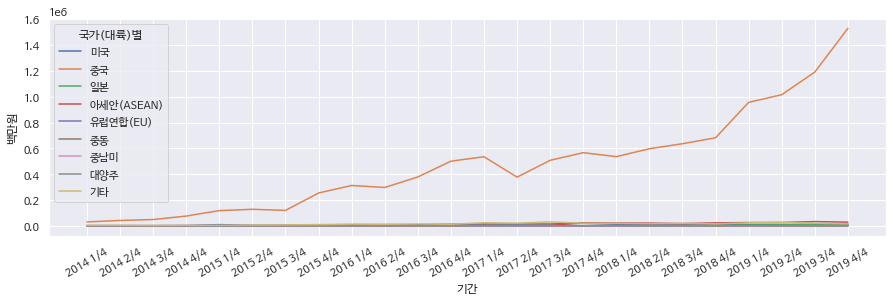

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

중국에서의 가장 판매액이 높습니다.

http://world.kbs.co.kr/service/news_view.htm?lang=k&Seq_Code=346701  

    국가별로 보면 중국이 우리나라에서 1조 6517억 원어치를 온라인으로 구매해 가장 많이 사갔고 아세안, 일본이 뒤를 이었습니다.
기사에서도 중국이 판매량이 많다는 기사를 확인하실 수 있습니다.  

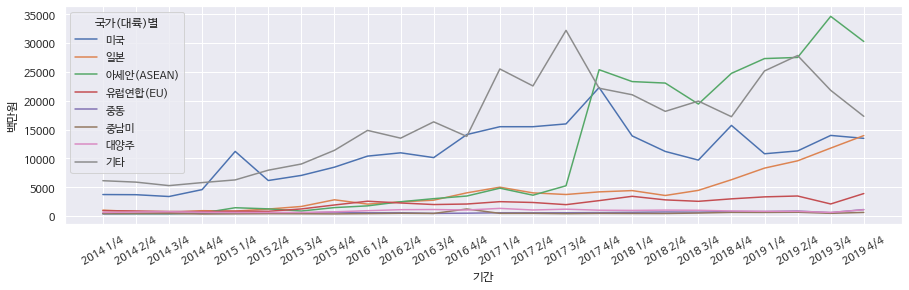

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

중국을 빼고 시각화 그래프를 그리면 아세안 에서 최근 높은 판매량을 기록했음을 알 수 있습니다.

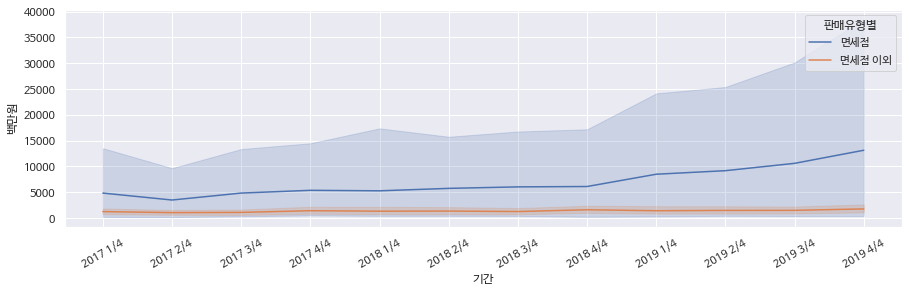

In [ ]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하기

plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

기간 별로 시각화를 하게 됩니다. 2017년 데이터부터 나타납니다.



"계" 데이터를 빼고 그래프를 그리니 온라인 면세점이 성장하고 있다는 사실을 알 수 있습니다.

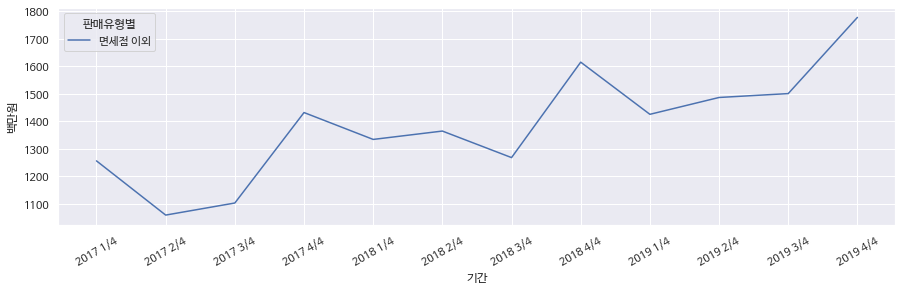

In [ ]:
plt.figure(figsize=(15,4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

이번에는 온라인 면세점도 빼고 시각화를 해보겠습니다.



면세점 이외에서도 증가 추세를 볼 수 있습니다.

**6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액**

**<의류 및 패션 관련 상품의 판매액 시각화>**

In [ ]:
# df_fashion 이라는 변수에 의류 데이터만 가져와 따로 담아주기

df_fashion = df[df["상품군별"] == "의류 및 패션 관련상품"].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
67,미국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1
68,미국,의류 및 패션 관련상품,면세점 이외,2014 1/4,NaN,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
112,중국,의류 및 패션 관련상품,면세점,2014 1/4,NaN,2014,1


의류 데이터만 df_fashion 변수에 넣습니다.

In [ ]:
# df_fashion 이라는 변수에 의류 데이터 중 판매유형별이 계인 데이터만 가져와 따로 담아주기

df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1


동시에 "판매유형별"이 "계"인 데이터를 df_fashion에 넣어봅니다.

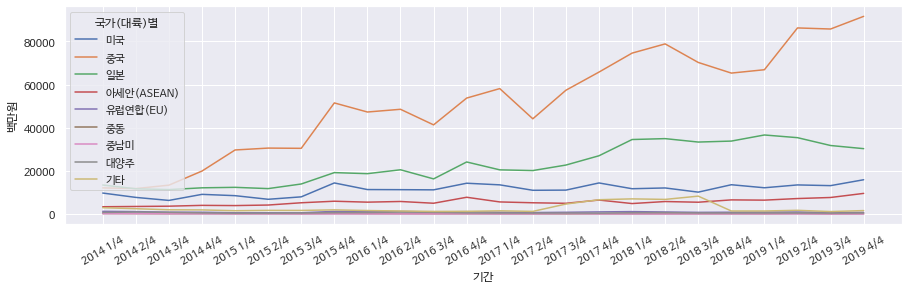

In [ ]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

기간별 금액 데이터를 시각화하고, 국가(대륙별)을 색상으로 표시해봅니다.


그래프를 그려보니 꾸준히 증가하고 있습니다. 중국, 일본, 미국, 아세안 순으로 성장하고 있습니다.

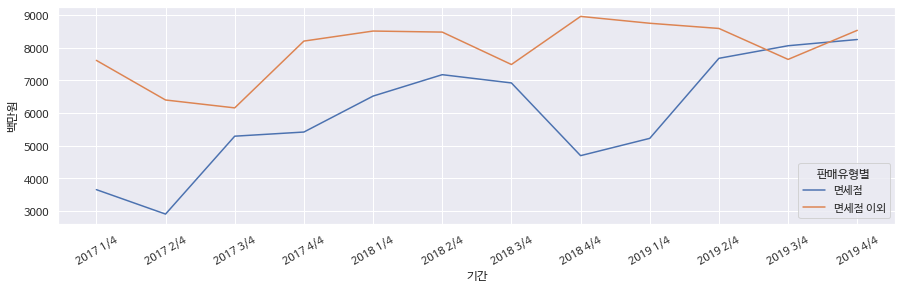

In [ ]:
# "의류 및 패션 관련상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기

df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)   # ci : 신뢰구간

"계"를 제거하고 그립니다.



2017년 데이터 부터 볼 수 있습니다.



면세점 이외의 데이터는 꾸준히 성장했고, 면세점 데이터도 성장하고 있습니다. 두 부문 모두 계속 성장 중입니다.

**6.4 데이터 집계하기**

In [ ]:
df_fashion

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014 1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014 1/4,1364.0,2014,1
...,...,...,...,...,...,...,...
10596,유럽연합(EU),의류 및 패션 관련상품,계,2019 4/4,862.0,2019,4
10641,중동,의류 및 패션 관련상품,계,2019 4/4,242.0,2019,4
10686,중남미,의류 및 패션 관련상품,계,2019 4/4,124.0,2019,4
10731,대양주,의류 및 패션 관련상품,계,2019 4/4,626.0,2019,4


위에서 만들었던 패션 데이터만 따로 모아놓은 변수를 사용합니다.

In [ ]:
df_fashion.pivot_table?

    This first example aggregates values by taking the sum.

    >>> table = pd.pivot_table(df, values='D', index=['A', 'B'],
    ...                     columns=['C'], aggfunc=np.sum)
    >>> table
    C        large  small
    A   B
    bar one    4.0    5.0
        two    7.0    6.0
    foo one    4.0    1.0
        two    NaN    6.0

    We can also fill missing values using the `fill_value` parameter.

In [ ]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기

df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원")

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,2420.75,1812.00,1479.50,3596.75,5975.25,1577.25
대양주,848.00,587.25,850.25,566.50,681.25,596.75
미국,8305.75,9516.50,12112.75,12588.25,11968.75,13758.75
아세안(ASEAN),3734.00,4909.75,6119.50,5667.75,5767.00,7804.25
유럽연합(EU),1121.25,843.50,1224.75,934.00,1028.50,923.50
일본,12240.00,14398.50,19976.25,22646.00,34200.00,33560.75
중국,14382.75,35584.75,47733.00,56351.75,72212.00,82563.50
중남미,243.75,154.00,162.25,190.50,144.00,135.75
중동,293.00,254.50,242.00,193.00,219.75,231.00


aggfunc 옵션의 기본값이 mean이기 때문에 평균값이 나옵니다.

In [ ]:
df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


aggfunc의 값을 sum으로 하여 합계값을 알아봅니다.

In [ ]:
df_fashion["판매유형별"].value_counts()

계    216
Name: 판매유형별, dtype: int64

계만 있기 때문에 이 데이터를 가공 없이 그대로 sum을 사용하면 연도별 합계를 알 수 있습니다.

In [ ]:
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0


result라는 변수에 데이터를 담아봅니다.

**6.5 연산결과를 시각적으로 보기**

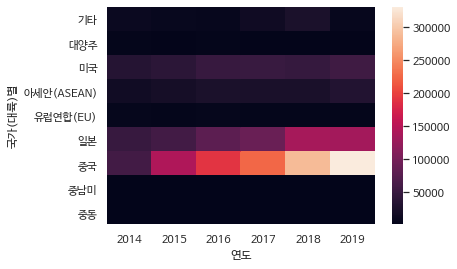

In [ ]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기

sns.heatmap(result)

heatmap을 그려보면 온라인에서 판매가 상당히 많이 일어난다는 것을 알 수 있습니다.


vmax는 시각화를 할 때 나타내는 최대값입니다. 이번에는 vmax와 vmin의 기본값을 그대로 사용해보겠습니다.

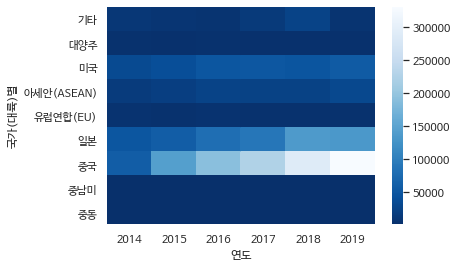

In [ ]:
sns.heatmap(result, cmap = "Blues_r")

cmap 옵션으로 색상을 변경합니다.

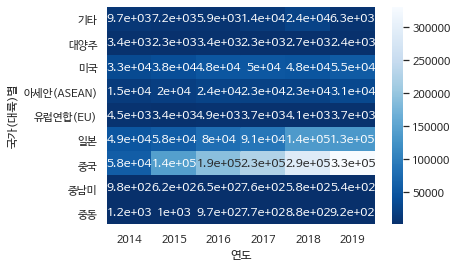

In [ ]:
sns.heatmap(result, cmap = "Blues_r", annot=True)

annot 옵션으로 수치를 표시합니다.

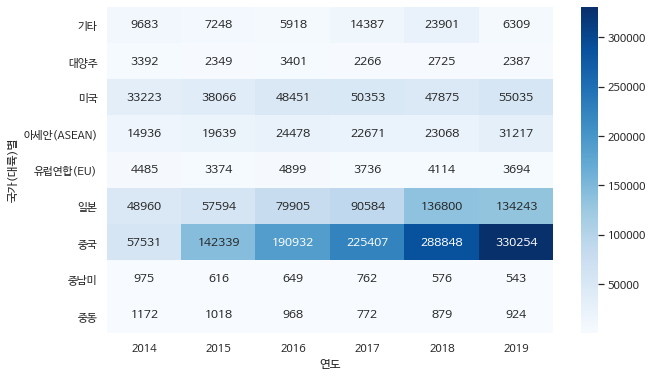

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")   # cmap="Blues"로 색 변경

fmt 옵션으로 소숫점 없이 float형의 숫자를 나타낼 수 있습니다.

 

plt.figure()로 그래프의 사이즈를 재설정합니다.



중국에서 구매액이 가장 많습니다. 미국과 일본에서도 구매액이 늘어나고 있습니다.

 

연도, 대륙 별로 같이 볼 수 있습니다. pivot table로는 분포를 보기는 어려운데 heatmap에서는 분포를 색상으로 편하게 볼 수 있습니다.

# **7 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?**

In [ ]:
df_total

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
10785,기타,아동·유아용품,계,2019 4/4,193.0,2019,4
10788,기타,음·식료품,계,2019 4/4,319.0,2019,4
10791,기타,농축수산물,계,2019 4/4,2.0,2019,4
10794,기타,생활용품 및 자동차용품,계,2019 4/4,531.0,2019,4


판매유형별이 "계"인 데이터만 모인 데이터프레임을 활용해보겠습니다.

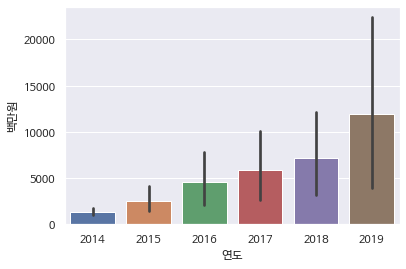

In [ ]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

sns.barplot(data=df_total, x="연도", y="백만원")

x축에 연도, y축에 금액을 넣어보겠습니다.

그래프를 보면 판매액이 꾸준히 증가했다는 사실을 알 수 있고, 신뢰구간도 연도에 따라 계속 길어집니다.

estimator라는 옵션은 기본으로 mean(평균) 값을 구합니다.

**<lineplot 그리기>**

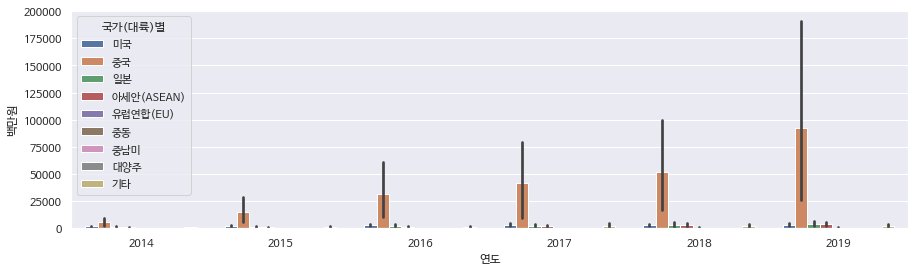

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

barplot으로 보기에는 불편하므로 lineplot으로 그려보겠습니다.

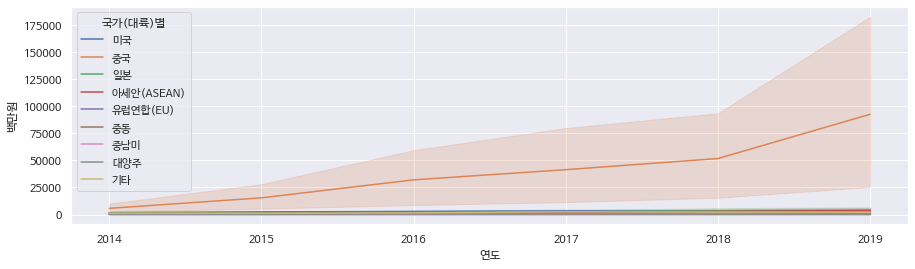

In [ ]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

seaborn의 장점은 그래프들의 사용법이 비슷하다는 것입니다. 그래서 쉽게 그래프 모양을 변경할 수 있습니다.



그래프에서는 꾸준히 판매액이 성장하고 있다는 사실을 알 수 있습니다.

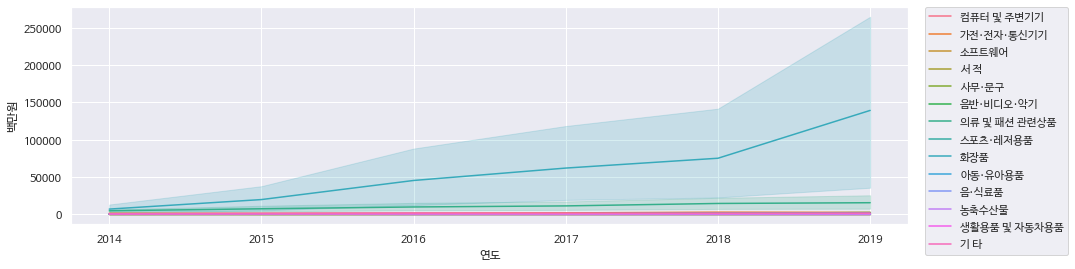

In [ ]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)   # legend 그래프 밖에 그리기

연도별 판매액을 "상품군별"로 다른 색상으로 표현해봤습니다.



legend 그래프를 밖에 그리기 위해 plt.legend() 함수를 사용합니다.



bbox_to_anchor를 변경하면 그래프와 범례 사이의 간격을 조절할 수 있습니다.



그래프의 가장 위에 있는 데이터는 화장품입니다.

기사의 데이터를 따라 검증했더니 실제로 온라인 쇼핑액이 증가하고 있고, 판매를 하는 사람들이 많아지고 있다는 것을 알 수 있습니다.

http://world.kbs.co.kr/service/news_view.htm?lang=k&Seq_Code=346701

    통계청이 5일 발표한 2019년 12월 및 연간 온라인쇼핑 동향 자료를 보면, 지난해 12월 온라인 쇼핑 거래액은 12조 5천865억 원을 기록했습니다. 
    1년 전 같은 달보다 17.6% 늘어난 금액입니다.